# Softmax prediction

Softmax is a combination of logistic regression and argmax:
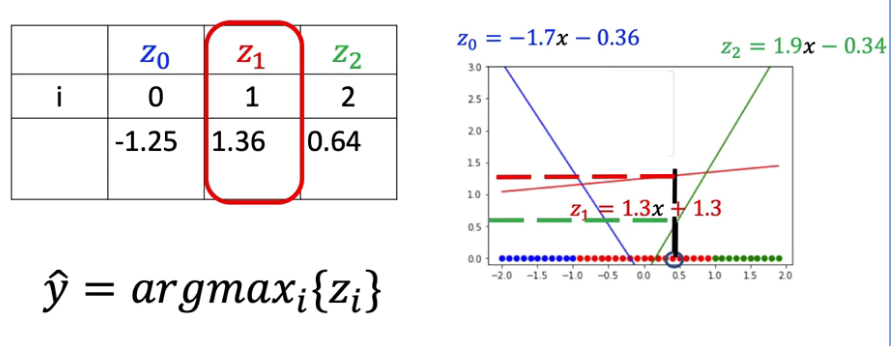

# Softmax function

## Custom module using nn.Module

In [1]:
import torch.nn as nn

class Softmax(nn.Module):
    def __init__(self, in_size, out_size):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)
    def forward(self, x):
        out = self.linear(x)
        return out

In [3]:
import torch
torch.manual_seed(1)
# 2 dimensions input samples and 3 output classes
model = Softmax(2,3)

In [6]:
x = torch.tensor([[1.0, 2.0]])
z = model(x)
z

tensor([[-0.4053,  0.8864,  0.2807]], grad_fn=<AddmmBackward>)

In [7]:
_, yhat = z.max(1)
yhat

tensor([1])

In [12]:
X=torch.tensor([[1.0, 1.0],[1.0, 2.0],[1.0, -3.0]])
z = model(X)
z

tensor([[-0.0932,  0.5545, -0.1433],
        [-0.4053,  0.8864,  0.2807],
        [ 1.1552, -0.7730, -1.8396]], grad_fn=<AddmmBackward>)

In [13]:
_, yhat = z.max(1)
yhat

tensor([1, 1, 0])

# Softmax PyTorch

## Load Data

In [14]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


In [16]:
train_dataset = dsets.MNIST(root='./data', train = True, download = True, transform=transforms.ToTensor())

validation_dataset = dsets.MNIST(root='./data', train = False, download = True, transform=transforms.ToTensor())

In [17]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## Create Model

In [18]:
import torch.nn as nn

class Softmax(nn.Module):
    def __init__(self, in_size, out_size):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)
    def forward(self, x):
        out = self.linear(x)
        return out

In [19]:
input_dim = 28 * 28
output_dim = 10
model = Softmax(input_dim, output_dim)

In PyTorch, when the loss criteria is specified as cross entropy loss, PyTorch will automatically perform Softmax classification based upon its inbuilt functionality.
Another note, the input for the loss criterion here needs to be a long tensor with dimension of n, instead of n by 1 which we had used previously for linear regression. 

In [20]:
criterion = nn.CrossEntropyLoss()

In [21]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 100
accuracy_list = []

In [22]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)


# Train Model

In [26]:
from tqdm import tqdm

for epoch in tqdm(range(n_epochs)):
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x.view(-1, 28 * 28))
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
    correct = 0
    for x_test, y_test in validation_loader:
        z = model(x_test.view(-1, 28 * 28))
        _, yhat = torch.max(z.data, 1)
        correct = correct+(yhat == y_test).sum().item()
    accuracy = correct / y.shape[0]
    accuracy_list.append(accuracy)

100%|██████████| 100/100 [10:03<00:00,  6.03s/it]


In [27]:
accuracy_list

[85.57,
 87.58,
 88.38,
 88.95,
 89.28,
 89.5,
 89.79,
 90.01,
 90.23,
 90.38,
 90.53,
 90.57,
 90.7,
 90.82,
 90.92,
 91.0,
 91.08,
 91.12,
 91.18,
 91.3,
 91.3,
 91.34,
 91.39,
 91.43,
 91.45,
 91.49,
 91.51,
 91.53,
 91.59,
 91.64,
 91.65,
 91.65,
 91.69,
 91.69,
 91.7,
 91.72,
 91.75,
 91.8,
 91.84,
 91.87,
 91.91,
 91.9,
 91.92,
 91.92,
 91.93,
 91.93,
 91.93,
 91.94,
 91.92,
 91.92,
 91.92,
 91.96,
 91.96,
 91.97,
 92.0,
 92.02,
 92.05,
 92.04,
 92.03,
 92.03,
 92.03,
 92.03,
 92.02,
 92.06,
 92.06,
 92.06,
 92.07,
 92.06,
 92.06,
 92.08,
 92.06,
 92.09,
 92.08,
 92.07,
 92.08,
 92.08,
 92.08,
 92.09,
 92.1,
 92.1,
 92.11,
 92.13,
 92.16,
 92.18,
 92.18,
 92.19,
 92.19,
 92.19,
 92.2,
 92.19,
 92.19,
 92.21,
 92.23,
 92.25,
 92.25,
 92.25,
 92.26,
 92.25,
 92.25,
 92.25,
 92.26,
 92.27,
 92.28,
 92.29,
 92.29,
 92.28,
 92.28,
 92.31,
 92.31,
 92.31,
 92.29,
 92.29,
 92.3,
 92.29,
 92.29,
 92.29,
 92.3,
 92.29,
 92.29,
 92.29,
 92.29,
 92.28,
 92.28,
 92.27,
 92.27,
 92.25,
 92.24

## View Results

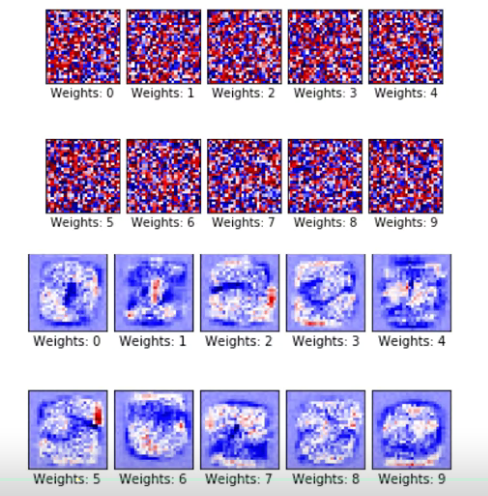

# Neural networks in One Dimension

## using PyTorch with nn.Module

In [1]:
import torch
import torch.nn as nn
from torch import sigmoid

In [2]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    def forward(self, x):
        x=sigmoid(self.linear1(x))
        x=sigmoid(self.linear2(x))
        return x
    

In [3]:
model = Net(1, 2, 1)
x = torch.tensor([0.0])
yhat = model(x)
yhat

tensor([0.5972], grad_fn=<SigmoidBackward>)

In [12]:
# multiple samples
x = torch.tensor([[0.0], [2.0], [3.0]])
yhat = model(x)
yhat

tensor([[0.5972],
        [0.5925],
        [0.5894]], grad_fn=<SigmoidBackward>)

In [13]:
# to get a discrete value we apply a threshold
yhat = yhat < 0.59
yhat

tensor([[False],
        [False],
        [ True]])

In [14]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[0.3820],
                      [0.4019]])),
             ('linear1.bias', tensor([-0.7746, -0.3389])),
             ('linear2.weight', tensor([[-0.3466,  0.2201]])),
             ('linear2.bias', tensor([0.4115]))])

## using PyTorch with nn.Sequential

In [15]:
model = nn.Sequential(nn.Linear(1, 2), nn.Sigmoid(), nn.Linear(2, 1), nn.Sigmoid())

## Train the model

### we create the data

In [16]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0]>-4) & (X[:, 0] <4)] = 1.0

### we create a training function

In [41]:
from tqdm import tqdm

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total = 0
    for epoch in tqdm(range(epochs)):
        total = 0
        for x, y in zip(X, Y):
            yhat = model(x)
            loss = criterion(yhat, y.view(-1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item()
        cost.append(total)
    return cost
            

### training process

In [42]:
#loss
criterion = nn.BCELoss()

#data
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0]>-4) & (X[:, 0] <4)] = 1.0

#model
model = Net(1, 2, 1)

#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

#train the model
cost = train(Y, X, model, optimizer, criterion, epochs=1000)


100%|██████████| 1000/1000 [00:12<00:00, 76.96it/s]


# Neural Networks More Hidden Neurons

## in PyTorch

In [43]:
import torch
import torch.nn as nn
from torch import sigmoid
from torch.utils.data import Dataset, DataLoader

class to get our dataset

In [50]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.linspace(-20, 20, 100).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:, 0]>-10) & (self.x[:, 0]<-5)] = 1
        self.y[(self.x[:, 0]>5) & (self.x[:, 0]<10)] = 1
        self.y = self.y.view(-1, 1)
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len


class for creating our model

In [51]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    def forward(self, x):
        x=sigmoid(self.linear1(x))
        x=sigmoid(self.linear2(x))
        return x

and the function to train our model

In [61]:
# The function for plotting the model
def PlotStuff(X, Y, model):
    
    plt.plot(X.numpy(), model(X).detach().numpy())
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')


In [65]:
def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    cost = []
    total=0
    for epoch in tqdm(range(epochs)):
        total=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            total+=loss.item() 
            PlotStuff(data_set.x, data_set.y, model)
        cost.append(total)
    return cost

process for training is identical to logistic regression

100%|██████████| 1000/1000 [00:03<00:00, 277.76it/s]


[0.8639951944351196,
 0.8623959422111511,
 0.8608019948005676,
 0.859213650226593,
 0.8576306104660034,
 0.8560532927513123,
 0.85448157787323,
 0.8529155254364014,
 0.8513553142547607,
 0.8498009443283081,
 0.8482524156570435,
 0.8467099666595459,
 0.8451735973358154,
 0.8436431884765625,
 0.8421188592910767,
 0.8406007885932922,
 0.839089035987854,
 0.8375833630561829,
 0.8360840678215027,
 0.8345910906791687,
 0.8331045508384705,
 0.8316243886947632,
 0.8301506042480469,
 0.8286833167076111,
 0.827222466468811,
 0.8257681131362915,
 0.8243203163146973,
 0.8228789567947388,
 0.8214441537857056,
 0.8200160264968872,
 0.818594217300415,
 0.8171790242195129,
 0.8157705068588257,
 0.8143684267997742,
 0.8129730224609375,
 0.8115841746330261,
 0.8102017045021057,
 0.8088259696960449,
 0.8074567317962646,
 0.8060940504074097,
 0.80473792552948,
 0.8033883571624756,
 0.8020452260971069,
 0.8007087111473083,
 0.7993786334991455,
 0.798055112361908,
 0.7967379689216614,
 0.7954275608062744,
 

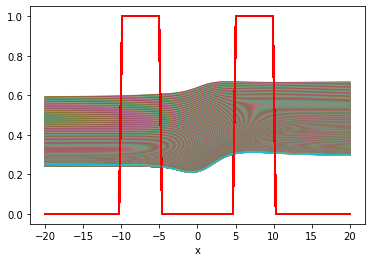

In [63]:
criterion = nn.BCELoss()
data_set = Data()
train_loader = DataLoader(dataset=data_set, batch_size=100)
model = Net(1, 6, 1)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
train(data_set, model, criterion, train_loader, optimizer, epochs=1000)

## using sequential

In [64]:
model = nn.Sequential(
    nn.Linear(1, 7),
    nn.Sigmoid(),
    nn.Linear(7, 1),
    nn.Sigmoid()
)

# Neural Networks with Multiple Dimensional Input

## in PyTorch

In [97]:
import torch
import torch.nn as nn
from torch import sigmoid
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import numpy as np

we create a dataset class

In [98]:
class XOR_Data(Dataset):
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0])
            self.y[i, 0] = torch.Tensor([0.0])
            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])
            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s
            
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len      
    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()

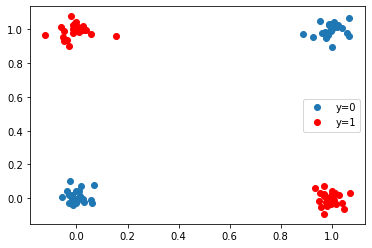

In [99]:
data = XOR_Data()
data.plot_stuff()

we create a class for creating our model

In [100]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    def forward(self, x):
        x=sigmoid(self.linear1(x))
        x=sigmoid(self.linear2(x))
        return x

we create a function to train our model

In [101]:
# Calculate the accuracy

def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

In [102]:
def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    COST = []
    ACC = []
    for epoch in tqdm(range(epochs)):
        total=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total+=loss.item()
        ACC.append(accuracy(model, data_set))
        COST.append(total)
        
    return COST

process for training is identical to logistic regression

In [103]:
criterion = nn.BCELoss()
data_set = XOR_Data()
train_loader = DataLoader(dataset=data_set, batch_size=1)
model = Net(2, 4, 1)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
train(data_set, model, criterion, train_loader, optimizer, epochs=500)

100%|██████████| 500/500 [00:18<00:00, 27.02it/s]


[74.39691025018692,
 71.22443449497223,
 69.96956899762154,
 69.48289567232132,
 69.29517501592636,
 69.22245997190475,
 69.19371777772903,
 69.18168497085571,
 69.17592978477478,
 69.17249184846878,
 69.16987133026123,
 69.16751354932785,
 69.16520893573761,
 69.16289061307907,
 69.16053211688995,
 69.15812659263611,
 69.15567380189896,
 69.15317261219025,
 69.1506210565567,
 69.14801901578903,
 69.14536619186401,
 69.14266002178192,
 69.13989979028702,
 69.13708400726318,
 69.13421130180359,
 69.1312803030014,
 69.12828636169434,
 69.1252316236496,
 69.12211048603058,
 69.11892372369766,
 69.11566877365112,
 69.11234253644943,
 69.10894376039505,
 69.10547041893005,
 69.10192114114761,
 69.09828984737396,
 69.09457850456238,
 69.09078514575958,
 69.08690237998962,
 69.08293449878693,
 69.07887160778046,
 69.07471948862076,
 69.0704665184021,
 69.06611609458923,
 69.06166291236877,
 69.05710643529892,
 69.0524423122406,
 69.04766750335693,
 69.04277610778809,
 69.03777003288269,
 69.0

## overfitting and underfitting

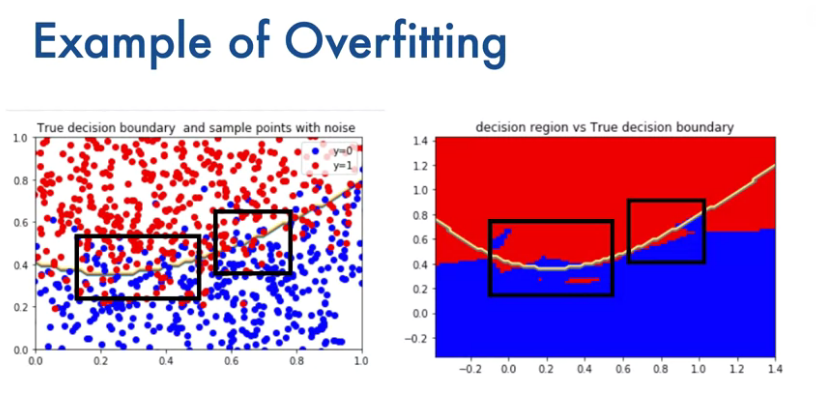

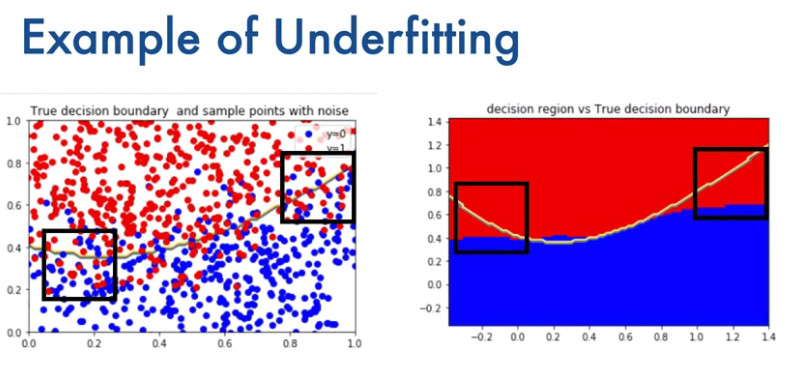

Solution
* use validation data to determine optimum number of neurons
* get more data
* regularization: for example dropout

# Multi-Class Neural Networks

## using nn.Module

In [104]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    def forward(self, x):
        x=sigmoid(self.linear1(x))
        x=(self.linear2(x))
        return x

## using nn.Sequential

In [107]:
input_dim = 2
hidden_dim = 6
output_dim = 3
model = nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.Sigmoid(),
    nn.Linear(hidden_dim, output_dim)
)

## training

we create a validation and training dataset

In [109]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
train_dataset = dsets.MNIST(root='./data', train = True, download = True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train = False, download = True, transform=transforms.ToTensor())

we create a validation and training loader

In [114]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=2000)

In [115]:
criterion = nn.CrossEntropyLoss()

we create the training function

In [116]:
from tqdm import tqdm
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in tqdm(range(epochs)):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

We instantiate and Train the model

In [119]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

100%|██████████| 30/30 [02:33<00:00,  5.10s/it]


Plot improper classified items

In [ ]:

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

# Backpropagation

Following rule chain for gradient calculation, it happens that gradient result are getting closer and closer to 0. (i.e. vanishing gradient) therefore we cannot improve model parameters.

One way to deal with that is to change activation function.


# Activation functions

## sigmoid, tanh, relu activation functions

## sigmoid, tanh, relu in PyTorch

In [120]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    def forward(self, x):
        x=sigmoid(self.linear1(x))
        x=(self.linear2(x))
        return x

In [121]:
class Net_tanh(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    def forward(self, x):
        x=torch.tanh(self.linear1(x))
        x=(self.linear2(x))
        return x

In [122]:
class Net_relu(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    def forward(self, x):
        x=torch.relu(self.linear1(x))
        x=(self.linear2(x))
        return x

In [123]:
model_tanh = nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.Tanh(),
    nn.Linear(hidden_dim, output_dim)
)

model_relu = nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim)
)

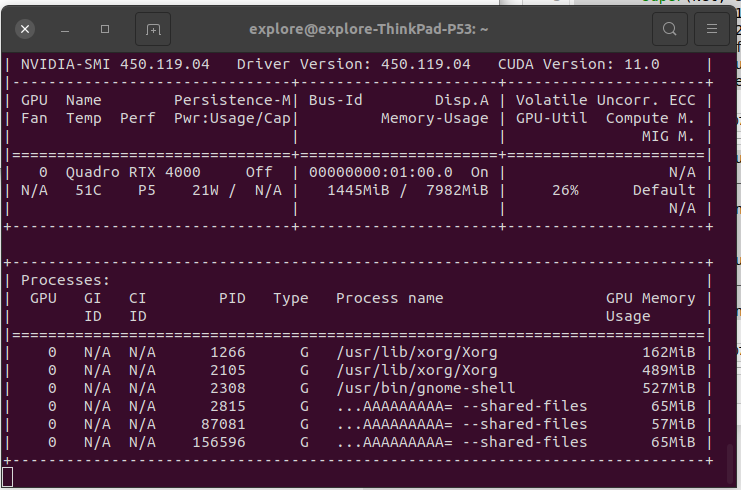